In [ ]:
import cv2

def get_frame(video_path, hour=0, minute=0, second=0):
    """
      Function to get a frame of specific hour, minute, and second from a video

      Parameters:
      video_path: path to video
      hour: hour of intended frame
      minute: minute of intended frame
      second: second of intended frame

      return an image of intended frame
    """
    video=cv2.VideoCapture(video_path)

    total_frame=video.get(cv2.CAP_PROP_FRAME_COUNT)
    framerate=video.get(cv2.CAP_PROP_FPS)

    hour=abs(hour)
    minute=abs(minute)
    second=abs(second)

    intented_frame= int((hour*3600+minute*60+second)*framerate)

    if intented_frame==0:
        intented_frame=1
    if intented_frame>total_frame:
      return 0

    video.set(1, intented_frame)
    ret, frame = video.read()
    return frame

In [ ]:
from tensorflow.keras import models
import pickle
import numpy as np

def load_model(model_path):
  model = models.load_model(model_path)
  return model

def load_box(box_path):
  file = open(box_path, 'rb')
  coordinates = pickle.load(file)
  file.close()
  return coordinates

def predict(frame, model, coordinates):
  """
    Function to get the number and location of empty parking spots on a frame

    Parameters:
    frame: image to be predicted
    model: model to predict
    coordinates: points of parking spots to be predicted

    return:
    empty: total of empty parking spots on frame
    final_frame: an image of frame with empty parking spots marked with green box
  """
  final_frame = frame.copy()
  empty = 0

  for i in range(len(coordinates)):
    points = coordinates[i]
    x,y,w,h = cv2.boundingRect(points)
    crop = frame[y:y+h, x+1:x+w]

    test = cv2.resize(crop, (300,300))
    test = np.expand_dims(test, axis=0)
    pred = model.predict(test)

    if (pred < 0.9):
      empty += 1
      points = coordinates[i].reshape((-1, 1, 2))
      final_frame = cv2.polylines(final_frame, [points], True, color=(0,255,0), thickness=2)
  
  height = final_frame.shape[1]
  final_frame = final_frame[50:y+height, :]
  return empty, final_frame

In [ ]:
# get frame on 2:11
frame = get_frame('/content/drive/MyDrive/videos/afternoon.mp4', hour=0, minute=2, second=11)

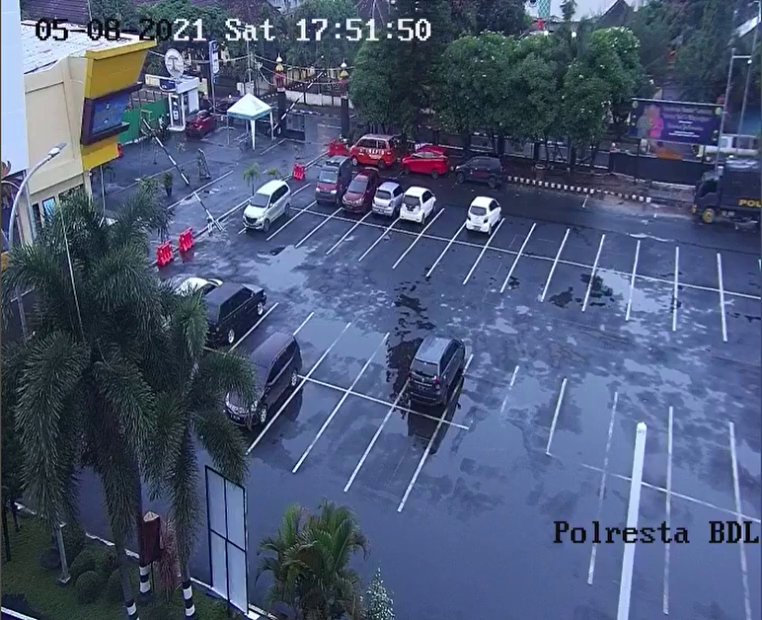

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)

In [ ]:
# load model
model = load_model('/content/drive/MyDrive/model/vgg16.h5')

# load coordinates
coordinates = load_box('/content/drive/MyDrive/coordinates/points_polresta_fixed.pkl')

# predict frame
empty, prediction = predict(frame, model, coordinates)

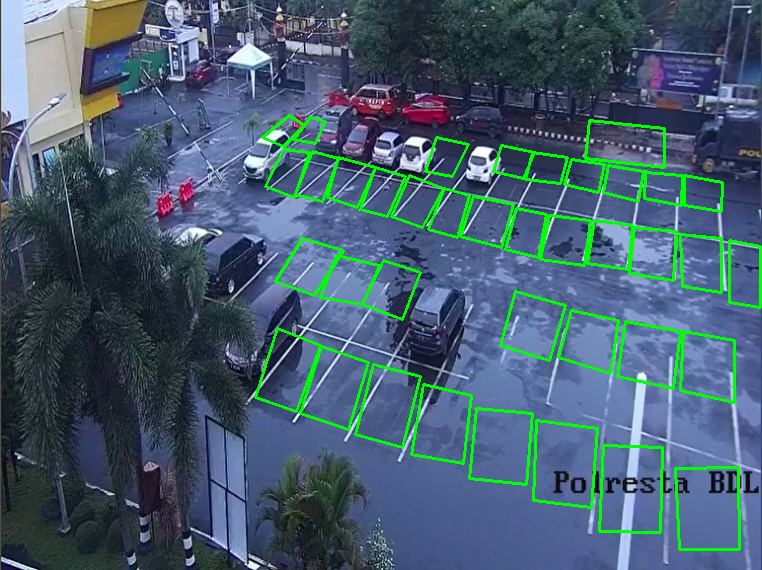

In [ ]:
cv2_imshow(prediction)

In [ ]:
cv2.imwrite("/content/drive/MyDrive/result/result_prediction.jpg", prediction)

True

In [ ]:
print(empty)

38
